In [1]:


import tensorflow as tf
tf.test.is_gpu_available()



Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import itertools
#import random
#import shutil
#for broken data stream error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:


model = keras.models.load_model("D:/drive/raks_model14.h5")



In [35]:


def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)



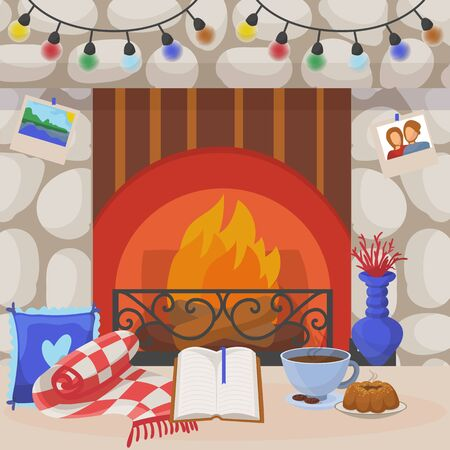

In [57]:


from IPython.display import Image
Image(filename='twisted2.jpg', width=300,height=200)



In [58]:
preprocessed_image = prepare_image('twisted2.jpg')
predictions = model.predict(preprocessed_image)
print("Fire :",str(predictions[0][0]*100)[:4] + "%"," |Not Fire:",str(predictions[0][1]*100)[:4]+"%")
labels=(predictions>0.5).astype(np.int)
#print(labels)
if labels[0][0]==1 :
    print("Fire detected")
else:
    print("No Fire detected")

#results = imagenet_utils.decode_predictions(predictions)
#results

Fire : 99.9%  |Not Fire: 5.90%
Fire detected


C:\Users\mamoo\AppData\Local\Temp\ipykernel_12316\365493397.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels=(predictions>0.5).astype(np.int)
